### Acknowledgements
Creators: 
1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D. 
2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D. 
3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D. 
4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.

Donor: ics.uci.edu

### This Data contains all requied data about the patients with heart disease and without disease .

### Goal :::
### your goal is to predict will the person is going to prone to Heart Disease . 

### Attribute Information: 
> 1. age (age in years)
> 2. sex (1 = male; 0 = female)
> 3. cp -- chest pain type (4 values) 
> 4. trestbps -- resting blood pressure (in mm Hg on admission to the hospital)
> 5. chol -- serum cholestoral in mg/dl 
> 6. fbs -- fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
> 7. restecg -- resting electrocardiographic results (values 0,1,2)
> 8. thalach -- maximum heart rate achieved 
> 9. exang -- exercise induced angina (1 = yes; 0 = no)
> 10. oldpeak -- ST depression induced by exercise relative to rest 
> 11. slope -- the slope of the peak exercise ST segment 
> 12. ca -- number of major vessels (0-3) colored by flourosopy 
> 13. thal -- 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. target --1 or 0

### The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

In [1]:
import numpy as np
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier,VotingClassifier,AdaBoostClassifier,BaggingClassifier
import xgboost as xgb

from sklearn import metrics

In [222]:
from prettytable import PrettyTable

In [169]:
df=pd.read_csv('heart.csv')

In [170]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [171]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [172]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

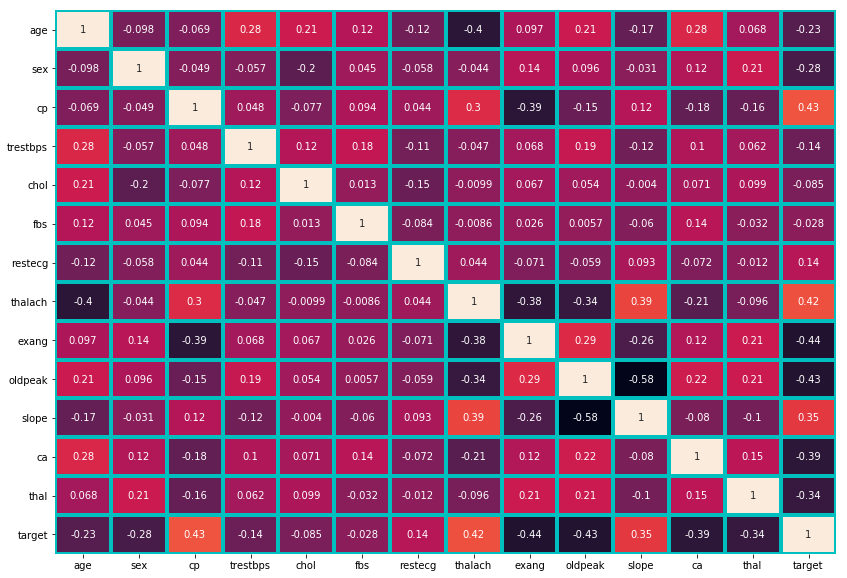

In [15]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr,annot=True,linewidths=3,linecolor='c',cbar=False)
plt.show()

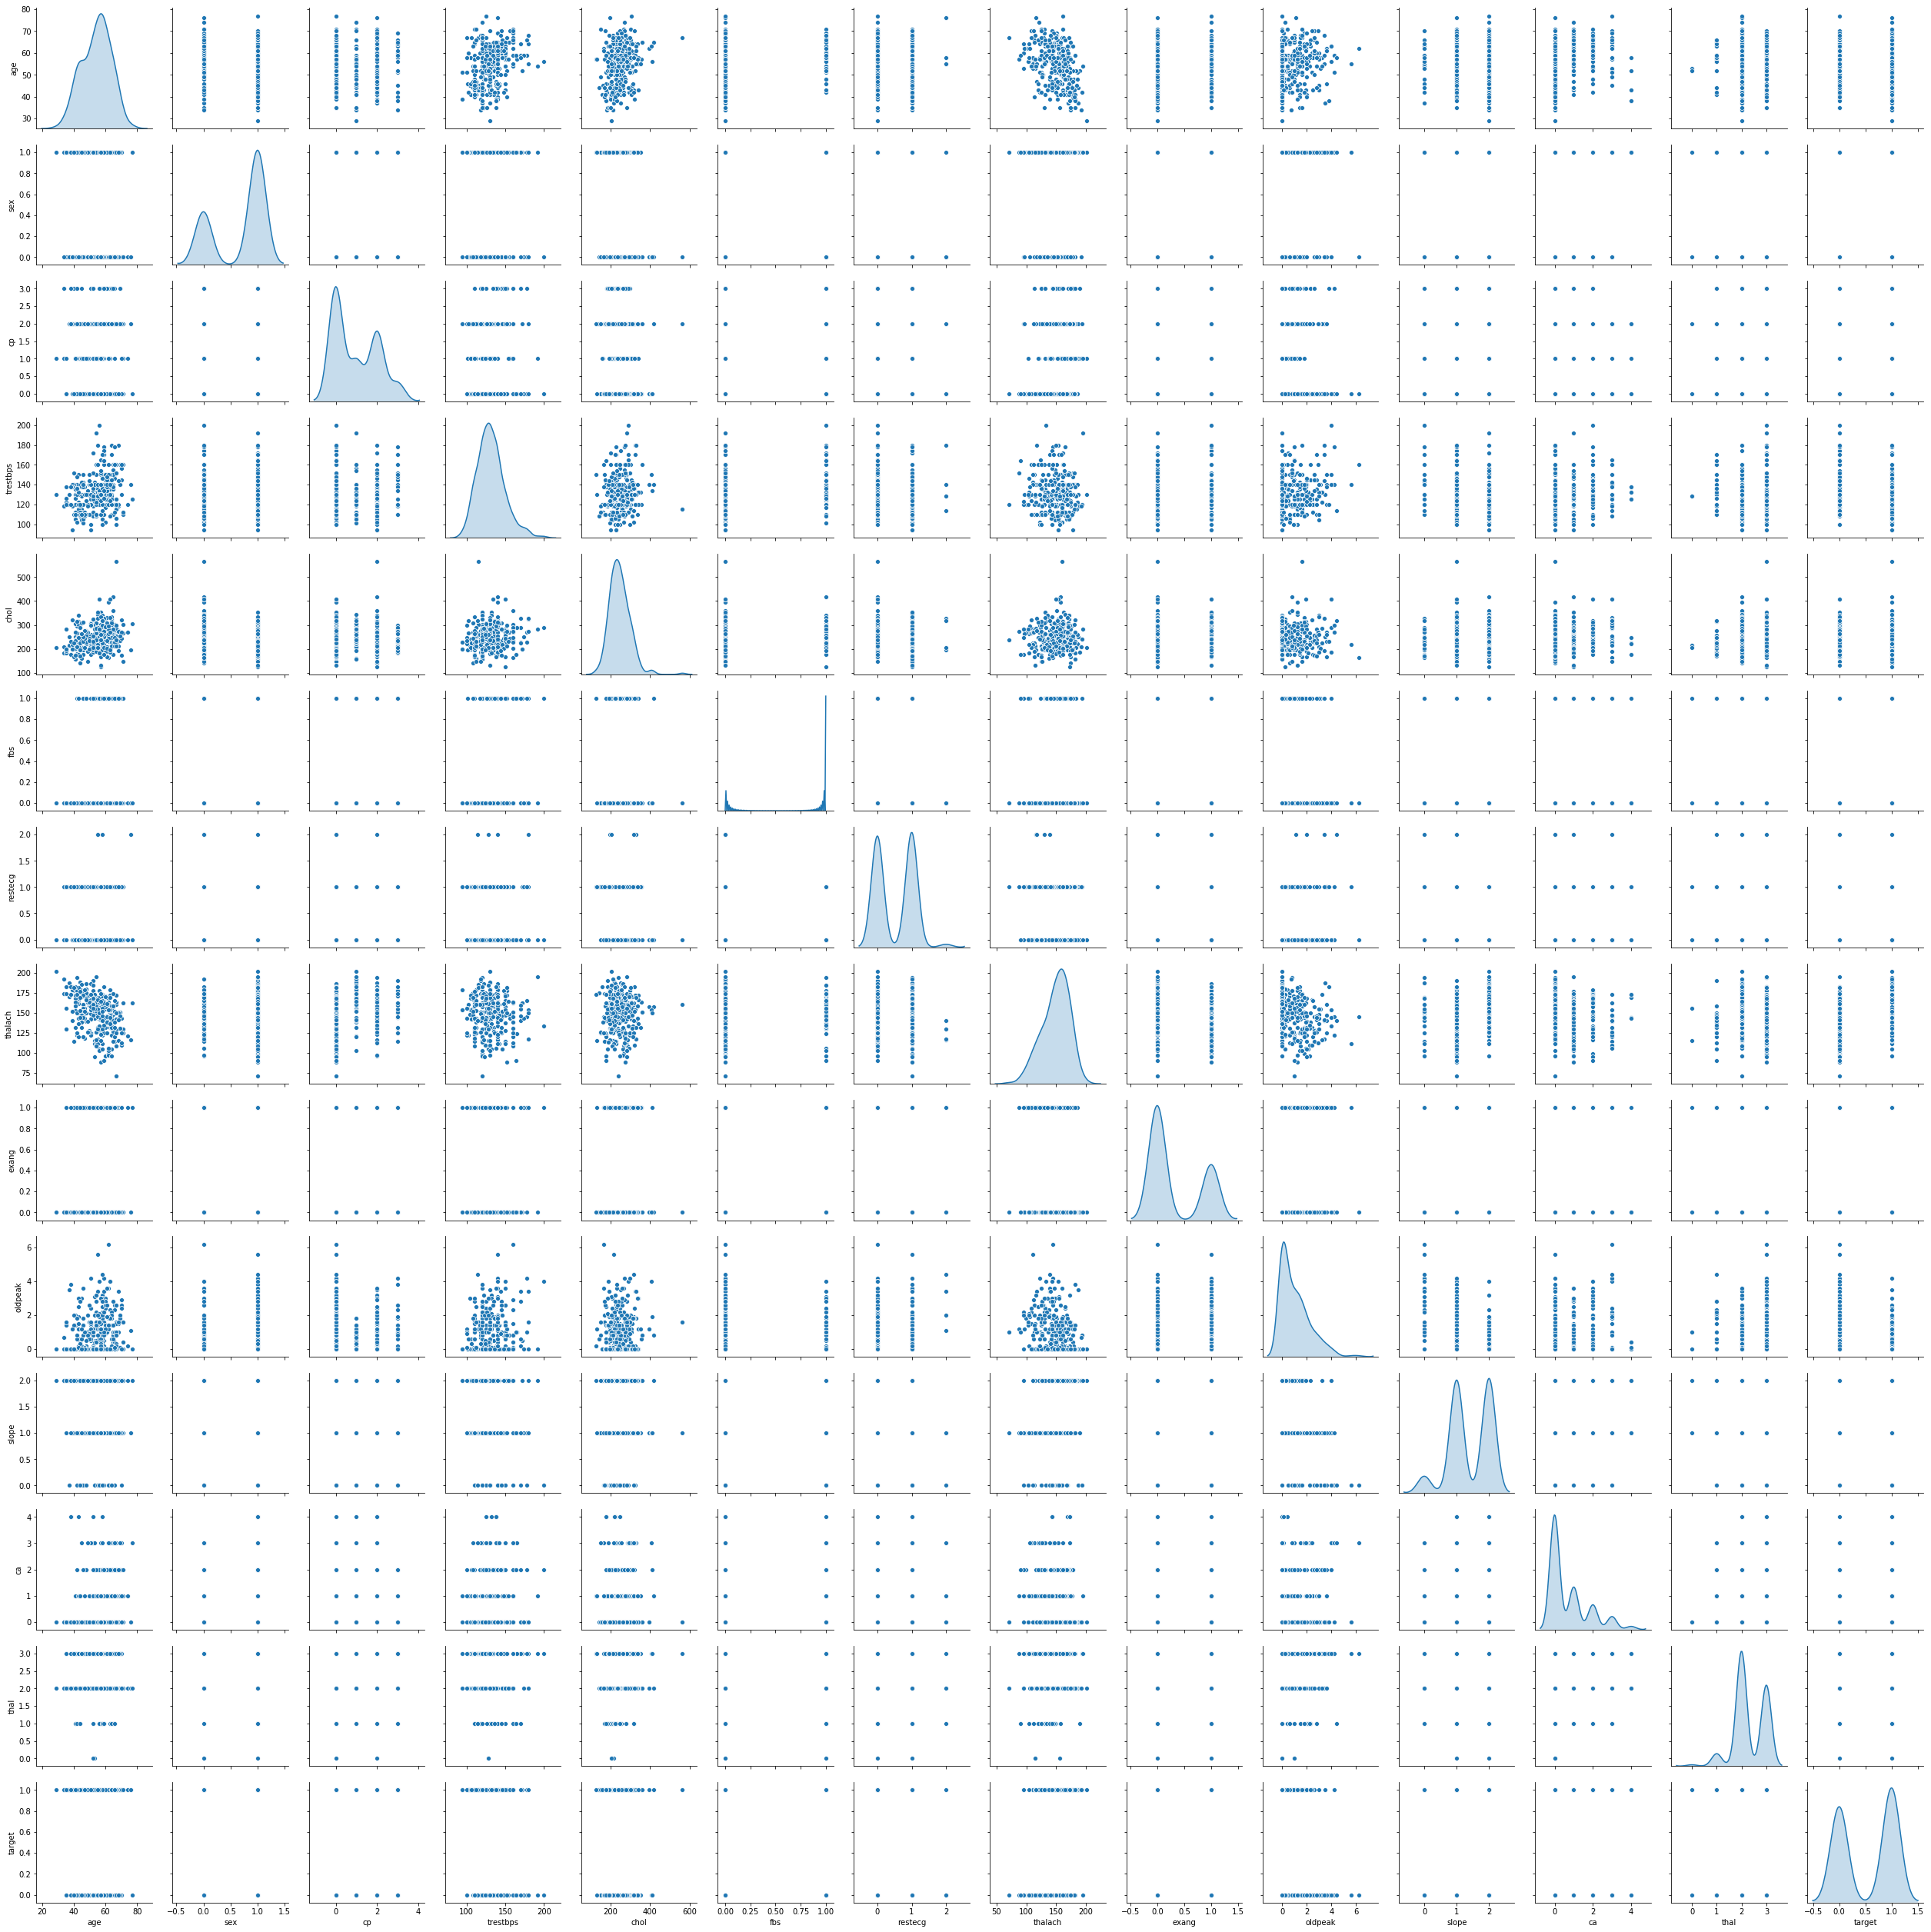

In [15]:
sns.pairplot(df,diag_kind='kde')

## when chest pain occured what is level of chest pain felt by gender and by age

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


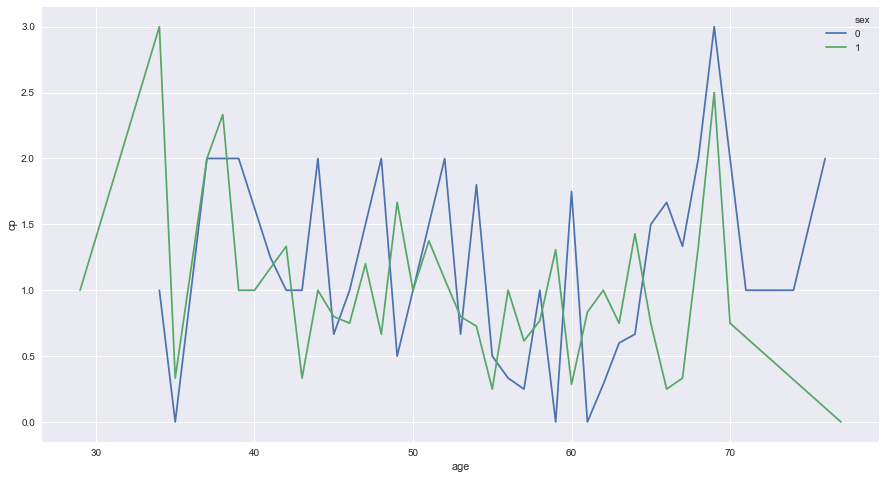

In [26]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
sns.lineplot(x=df.age,y=df.cp,hue=df.sex,ci=0)
plt.show()
# 0 -- female       1 -- male

## Comparing Cholesterol level & Resting ECG

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


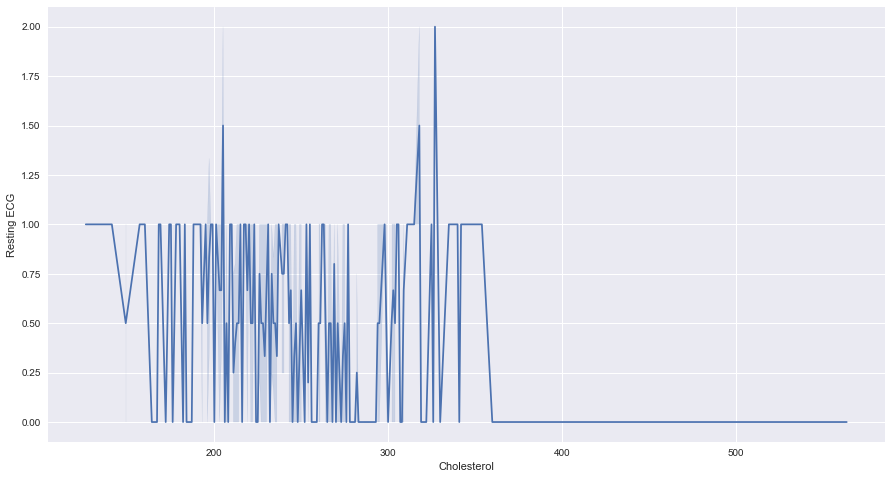

In [18]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
sns.lineplot(x=df.chol,y=df.restecg)
plt.xlabel('Cholesterol')
plt.ylabel('Resting ECG')
plt.show()

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


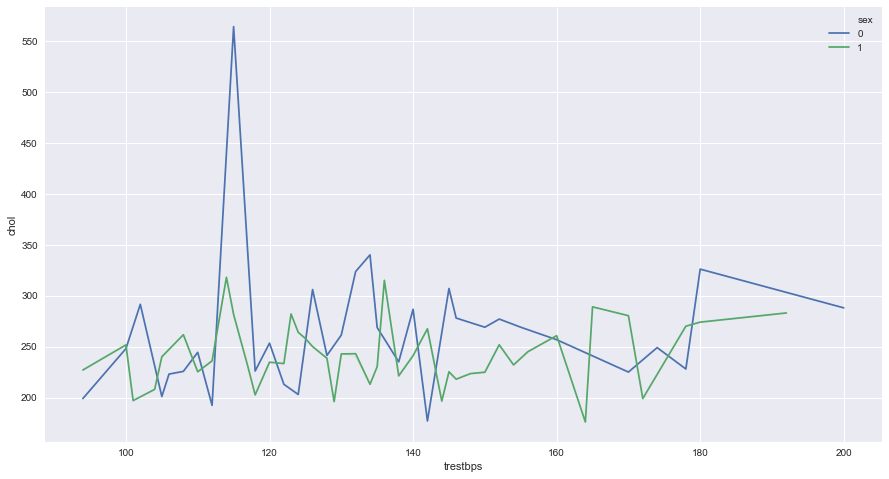

In [21]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn')
sns.lineplot(x=df.trestbps,y=df.chol,hue=df.sex,ci=0)
plt.show()

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


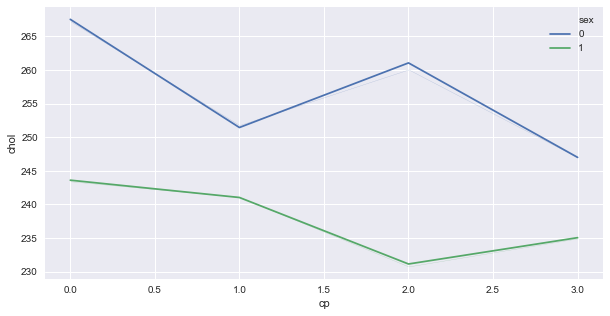

In [174]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn')
sns.lineplot(x=df.cp,y=df.chol,hue=df.sex,ci=0)
plt.legend()
plt.show()
# 1 --Male    0 --Female

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


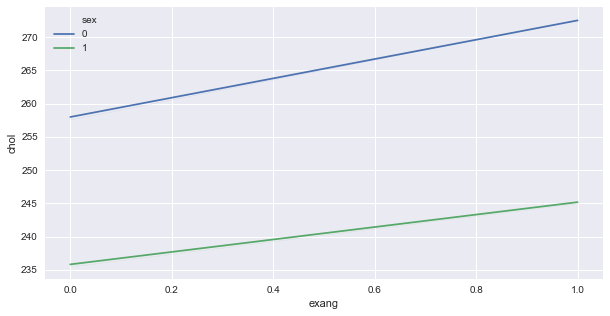

In [175]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn')
sns.lineplot(x=df.exang,y=df.chol,hue=df.sex,ci=0)
plt.show()

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


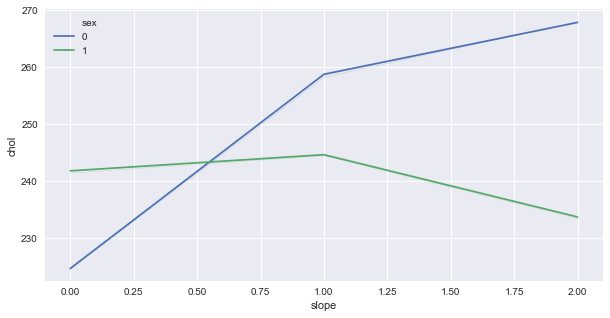

In [176]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn')
sns.lineplot(x=df.slope,y=df.chol,hue=df.sex,ci=0)
plt.show()

C:\Users\KRISH8\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


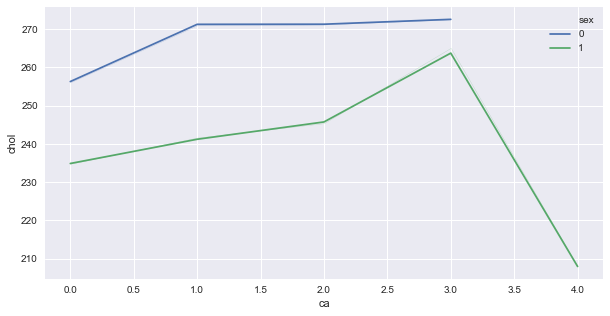

In [177]:
plt.figure(figsize=(10,5))
plt.style.use('seaborn')
sns.lineplot(x=df.ca,y=df.chol,hue=df.sex,ci=0)
plt.show()

## checking outliers in Age

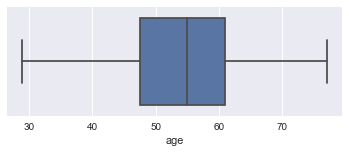

In [35]:
plt.figure(figsize=(6,2))
plt.style.use('seaborn')
sns.boxplot(x=df.age)
plt.show()

## checking outliers in Resting blood pressure

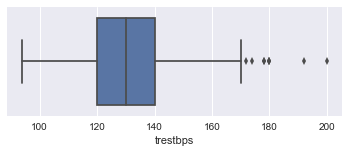

In [36]:
plt.figure(figsize=(6,2))
plt.style.use('seaborn')
sns.boxplot(x=df.trestbps)
plt.show()

## checking outliers in Cholesterol

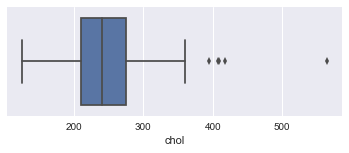

In [37]:
plt.figure(figsize=(6,2))
plt.style.use('seaborn')
sns.boxplot(x=df.chol)
plt.show()

## checking outliers in Maximum heartrate reached

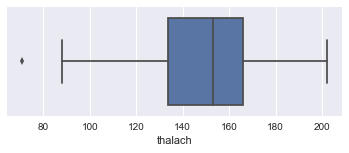

In [38]:
plt.figure(figsize=(6,2))
plt.style.use('seaborn')
sns.boxplot(x=df.thalach)
plt.show()

## checking outliers in ST depression induced by exercise

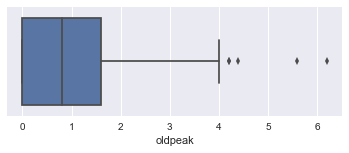

In [39]:
plt.figure(figsize=(6,2))
plt.style.use('seaborn')
sns.boxplot(x=df.oldpeak)
plt.show()

## cross_tab is one of the commonly used method used in EDA 

In [53]:
pd.crosstab(df.target.count(),df.sex)

sex,0,1
row_0,,
303,96,207


In [178]:
data = df.copy(deep=True)

# how to handle outliers 

In [179]:
from scipy import stats
data_out = data[np.abs((stats.zscore(data)) < 3) .all(axis=1)].copy()

### above i showed the technique to handle outliers but i did not removed the outliers because in health every report is important and although there are very few rows in give dataset so that is the reason i did not eliminated the outliers

In [180]:
df1_y=df.iloc[:,-1]
df1_x=df.iloc[:,:-1]

In [191]:
x1train,x1test,y1train,y1test=train_test_split(df1_x,df1_y,random_state=43)

In [192]:
sc1=StandardScaler()
X1train=sc1.fit_transform(x1train)
X1test=sc1.transform(x1test)

C:\Users\KRISH8\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\KRISH8\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\KRISH8\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


# Logistic Regression

In [223]:
LR1 = LogisticRegression(random_state=1)
LR1.fit(X1train,y1train)
LR_o_pre = LR1.predict(X1test)


print('accuracy ',metrics.accuracy_score(y1test,LR_o_pre))
print('recall',metrics.recall_score(y1test,LR_o_pre))
print('precision',metrics.precision_score(y1test,LR_o_pre))
print('F1',metrics.f1_score(y1test,LR_o_pre))
print('roc_auc_score',metrics.roc_auc_score(y1test,LR_o_pre))
print(metrics.classification_report(y1test,LR_o_pre))

print(metrics.confusion_matrix(y1test,LR_o_pre))



accuracy  0.8947368421052632
recall 1.0
precision 0.8333333333333334
F1 0.9090909090909091
roc_auc_score 0.8888888888888888
              precision    recall  f1-score   support

           0       1.00      0.78      0.88        36
           1       0.83      1.00      0.91        40

   micro avg       0.89      0.89      0.89        76
   macro avg       0.92      0.89      0.89        76
weighted avg       0.91      0.89      0.89        76

[[28  8]
 [ 0 40]]


C:\Users\KRISH8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [232]:
fpr1, tpr1, threshold = metrics.roc_curve(y1test,LR_o_pre)
roc_auc1 = metrics.auc(fpr1, tpr1)

# DecissionTree

In [194]:
dt1=DecisionTreeClassifier(criterion='gini',random_state=67)
dt1.fit(X1train,y1train)
dt_o_pre = dt1.predict(X1test)

print('accuracy ',metrics.accuracy_score(y1test,dt_o_pre))
print('precision',metrics.precision_score(y1test,dt_o_pre))
print('recall',metrics.recall_score(y1test,dt_o_pre))
print('F1',metrics.f1_score(y1test,dt_o_pre))
print('roc_auc_score',metrics.roc_auc_score(y1test,dt_o_pre))
print(metrics.confusion_matrix(y1test,dt_o_pre))
print(metrics.classification_report(y1test,dt_o_pre))

accuracy  0.7894736842105263
precision 0.8157894736842105
recall 0.775
F1 0.7948717948717949
roc_auc_score 0.7902777777777777
[[29  7]
 [ 9 31]]
              precision    recall  f1-score   support

           0       0.76      0.81      0.78        36
           1       0.82      0.78      0.79        40

   micro avg       0.79      0.79      0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



In [234]:
fpr2, tpr2, threshold = metrics.roc_curve(y1test,dt_o_pre)
roc_auc2 = metrics.auc(fpr2, tpr2)

# RandomForest

In [195]:
rf_o = RandomForestClassifier(random_state=60,n_estimators=29)
rf_o.fit(X1train,y1train)
rf_o_pre=rf_o.predict(X1test)

print('accuracy ',metrics.accuracy_score(y1test,rf_o_pre))
print('precision',metrics.precision_score(y1test,rf_o_pre))
print('recall',metrics.recall_score(y1test,rf_o_pre))
print('F1',metrics.f1_score(y1test,rf_o_pre))
print('roc_auc_score',metrics.roc_auc_score(y1test,rf_o_pre))
print(metrics.confusion_matrix(y1test,rf_o_pre))
print(metrics.classification_report(y1test,rf_o_pre))


accuracy  0.8157894736842105
precision 0.782608695652174
recall 0.9
F1 0.8372093023255814
roc_auc_score 0.8111111111111111
[[26 10]
 [ 4 36]]
              precision    recall  f1-score   support

           0       0.87      0.72      0.79        36
           1       0.78      0.90      0.84        40

   micro avg       0.82      0.82      0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [243]:
fpr6, tpr6, threshold = metrics.roc_curve(y1test,rf_o_pre)
roc_auc6 = metrics.auc(fpr6, tpr6)

# Bagging

In [196]:
bg_o = BaggingClassifier(DecisionTreeClassifier(),n_estimators=11)
bg_o.fit(X1train,y1train)
bg_o_pre = bg_o.predict(X1test)

print(metrics.accuracy_score(y1test,bg_o_pre))
print(metrics.precision_score(y1test,bg_o_pre))
print(metrics.recall_score(y1test,bg_o_pre))
print(metrics.f1_score(y1test,bg_o_pre))
print(metrics.roc_auc_score(y1test,bg_o_pre))

0.8157894736842105
0.7708333333333334
0.925
0.840909090909091
0.8097222222222222


In [239]:
fpr3, tpr3, threshold = metrics.roc_curve(y1test,bg_o_pre)
roc_auc3 = metrics.auc(fpr3, tpr3)

# AdaBoost

In [221]:
ab_o = AdaBoostClassifier(DecisionTreeClassifier(),random_state=13,n_estimators=20,learning_rate=1)
ab_o.fit(X1train,y1train)
ab_0_pre = ab_o.predict(X1test)
    
print(metrics.accuracy_score(y1test,ab_0_pre))
print(metrics.precision_score(y1test,ab_0_pre))
print(metrics.recall_score(y1test,ab_0_pre))
print(metrics.f1_score(y1test,ab_0_pre))
print(metrics.roc_auc_score(y1test,ab_0_pre))

0.8421052631578947
0.85
0.85
0.85
0.8416666666666667


In [240]:
fpr4, tpr4, threshold = metrics.roc_curve(y1test,ab_0_pre)
roc_auc4 = metrics.auc(fpr4, tpr4)

# Voting classifier

In [ ]:
lr=LogisticRegression()
rf =RandomForestClassifier()
svm = SVC()
nb=GaussianNB()

In [214]:
vc_o = VotingClassifier(estimators=[('lr',lr),('rf',rf),('svm',svm),('nb',nb)],voting='hard')
vc_o=vc_o.fit(X1train,y1train)
vc_0_pre=vc_o.predict(X1test)

print(metrics.accuracy_score(y1test,vc_0_pre))
print(metrics.precision_score(y1test,vc_0_pre))
print(metrics.recall_score(y1test,vc_0_pre))
print(metrics.f1_score(y1test,vc_0_pre))
print(metrics.roc_auc_score(y1test,vc_0_pre))
print(metrics.confusion_matrix(y1test,vc_0_pre))

0.9078947368421053
0.8666666666666667
0.975
0.9176470588235294
0.9041666666666668
[[30  6]
 [ 1 39]]


C:\Users\KRISH8\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\KRISH8\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [241]:
fpr5, tpr5, threshold = metrics.roc_curve(y1test,vc_0_pre)
roc_auc5 = metrics.auc(fpr5, tpr5)

# roc_auc cruve

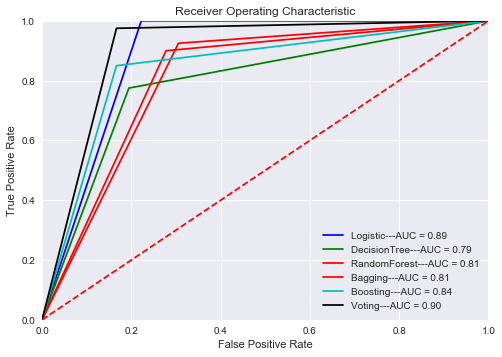

In [244]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'Logistic---AUC = %0.2f' % roc_auc1)
plt.plot(fpr2, tpr2, 'g', label = 'DecisionTree---AUC = %0.2f' % roc_auc2)
plt.plot(fpr6, tpr6, 'r', label = 'RandomForest---AUC = %0.2f' % roc_auc6)
plt.plot(fpr3, tpr3, 'r', label = 'Bagging---AUC = %0.2f' % roc_auc3)
plt.plot(fpr4, tpr4, 'c', label = 'Boosting---AUC = %0.2f' % roc_auc4)
plt.plot(fpr5, tpr5, 'k', label = 'Voting---AUC = %0.2f' % roc_auc5)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [245]:
t = PrettyTable(['Model', 'Accuracy', 'Recall','Precision','F1','roc_auc'])
t.add_row(['Random Forest',82,78,90,84,81])
t.add_row(['Logistic Regression',90,100,83,91,89])
t.add_row(['DecisionTree',79,82,78,79,79])
t.add_row(['Voting Classifier',91,87,98,92,90])
t.add_row(['Bagging',82,77,93,84,81])
t.add_row(['AdaBooating',84,85,85,85,84])

In [247]:
print(t)

+---------------------+----------+--------+-----------+----+---------+
|        Model        | Accuracy | Recall | Precision | F1 | roc_auc |
+---------------------+----------+--------+-----------+----+---------+
|    Random Forest    |    82    |   78   |     90    | 84 |    81   |
| Logistic Regression |    90    |  100   |     83    | 91 |    89   |
|     DecisionTree    |    79    |   82   |     78    | 79 |    79   |
|  Voting Classifier  |    91    |   87   |     98    | 92 |    90   |
|       Bagging       |    82    |   77   |     93    | 84 |    81   |
|     AdaBooating     |    84    |   85   |     85    | 85 |    84   |
+---------------------+----------+--------+-----------+----+---------+
